# CHALLENGE 1 

## Caso:  HR - Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
seed = 2023
target = 'is_promoted'
id_column = 'employee_id'

### Importamos la data

Comenzamos importando primero al train 

In [3]:
data_train = pd.read_csv('data/train.csv')
data = pd.read_csv('data/train.csv')

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Apreciamos la relacion de las variables

<Axes: xlabel='is_promoted', ylabel='avg_training_score'>

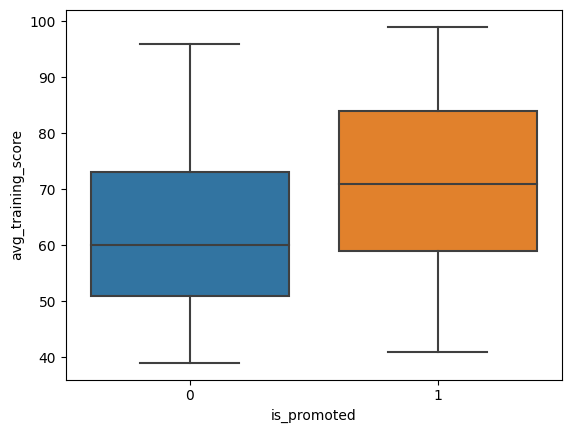

In [5]:
sns.boxplot(x = data_train['is_promoted'], y = data_train['avg_training_score'])

<Axes: xlabel='is_promoted', ylabel='previous_year_rating'>

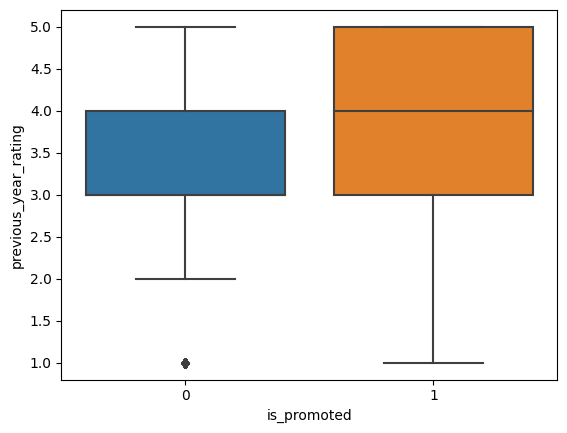

In [6]:
sns.boxplot(x = data_train['is_promoted'], y = data_train['previous_year_rating'])

Antes de hacer la matriz y ver la relacion entre variables, limpiamos algunas variables que tienes bastantes
categorias y otras que son redundantes

employee_id: esta variable es una identificacion para el empleado y no tiene relacion directa
con la variable target. Por lo tanto, puede ser eliminada sin afectar el rendimiento del modelo

region: esta variable no tienen una correlación clara con la variable target, asi que esta variable 
tambien podria descartarse

gender: si no hay sesgos de genero en las decisiones de promocion, 
esta variable podria ser descartada

length_of_service: al eliminar esta variable, reducimos la complejidad del modelo y evitamos 
la redundancia, ya que esta variable esta contenida dentro de education

<Axes: xlabel='is_promoted', ylabel='length_of_service'>

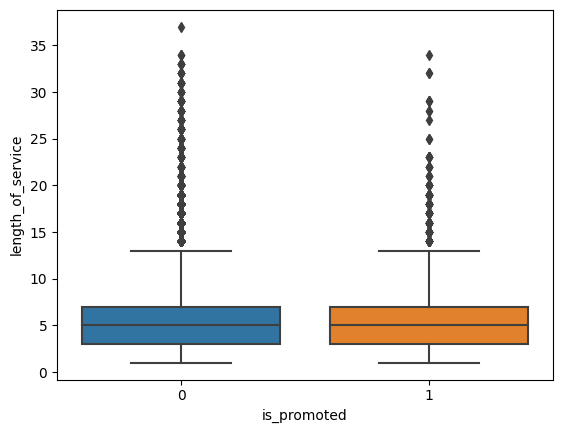

In [7]:
sns.boxplot(x = data_train['is_promoted'], y = data_train['length_of_service'])

In [8]:
clear = ['employee_id', 'region', 'gender', 'length_of_service']
data = data.drop(clear, axis = 1)

In [9]:
data.head()

,department,education,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,sourcing,1,35,5.0,1,0,49,0
1,Operations,Bachelor's,other,1,30,5.0,0,0,60,0
2,Sales & Marketing,Bachelor's,sourcing,1,34,3.0,0,0,50,0
3,Sales & Marketing,Bachelor's,other,2,39,1.0,0,0,50,0
4,Technology,Bachelor's,other,1,45,3.0,0,0,73,0


##  Matriz de Correlacion

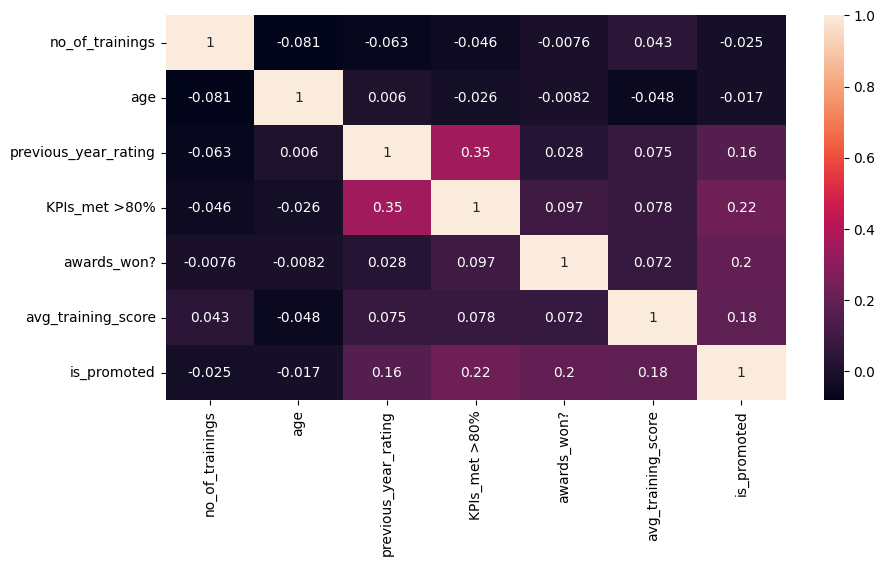

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

## DATA ORIGINAL

In [11]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [12]:
data_target_train = data_train[target]
data_target_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

## VIsualizando las  Variables

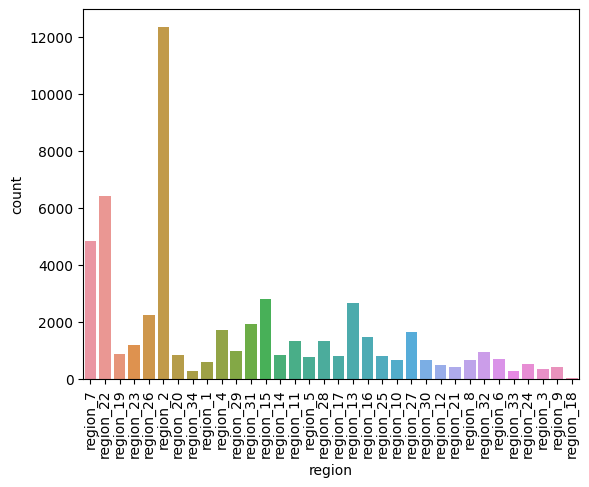

In [13]:
sns.countplot(x = "region", data = data_train)
plt.xticks(rotation = 90)
plt.show()

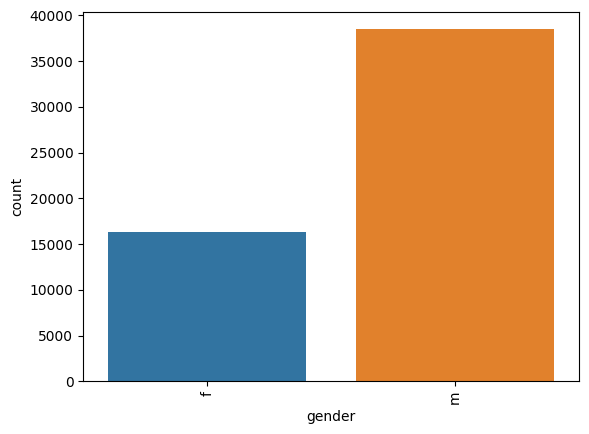

In [14]:
sns.countplot(x = "gender", data = data_train)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='is_promoted', ylabel='length_of_service'>

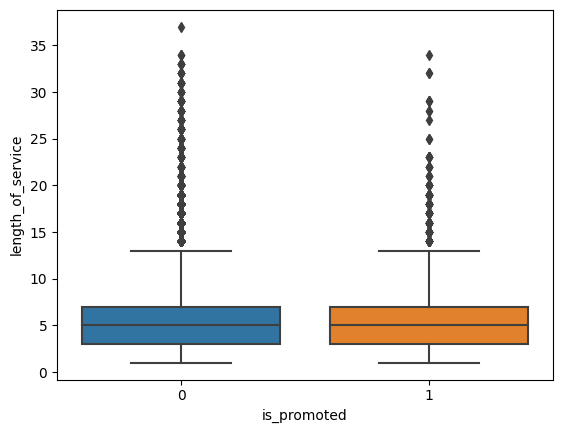

In [15]:
sns.boxplot(x = data_train['is_promoted'], y = data_train['length_of_service'])

In [16]:
data_train = data_train.drop(id_column, axis = 1)
data_train = data_train.drop(target, axis = 1)

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [18]:
data_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [19]:
data_train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Antes de hacer la matriz y ver la relacion entre variables, limpiamos algunas variables que tienes bastantes
categorias y otras que son redundantes

employee_id: esta variable es una identificacion para el empleado y no tiene relacion directa
con la variable target. Por lo tanto, puede ser eliminada sin afectar el rendimiento del modelo

region: esta variable no tienen una correlación clara con la variable target, asi que esta variable 
tambien podria descartarse

gender: si no hay sesgos de genero en las decisiones de promocion, 
esta variable podria ser descartada

length_of_service: al eliminar esta variable, reducimos la complejidad del modelo y evitamos 
la redundancia, ya que esta variable esta contenida dentro de education

In [20]:
data_train = data_train.drop('region', axis = 1)
data_train = data_train.drop('gender', axis = 1)
data_train = data_train.drop('length_of_service', axis = 1)

### Revisando si hay valores nulos 

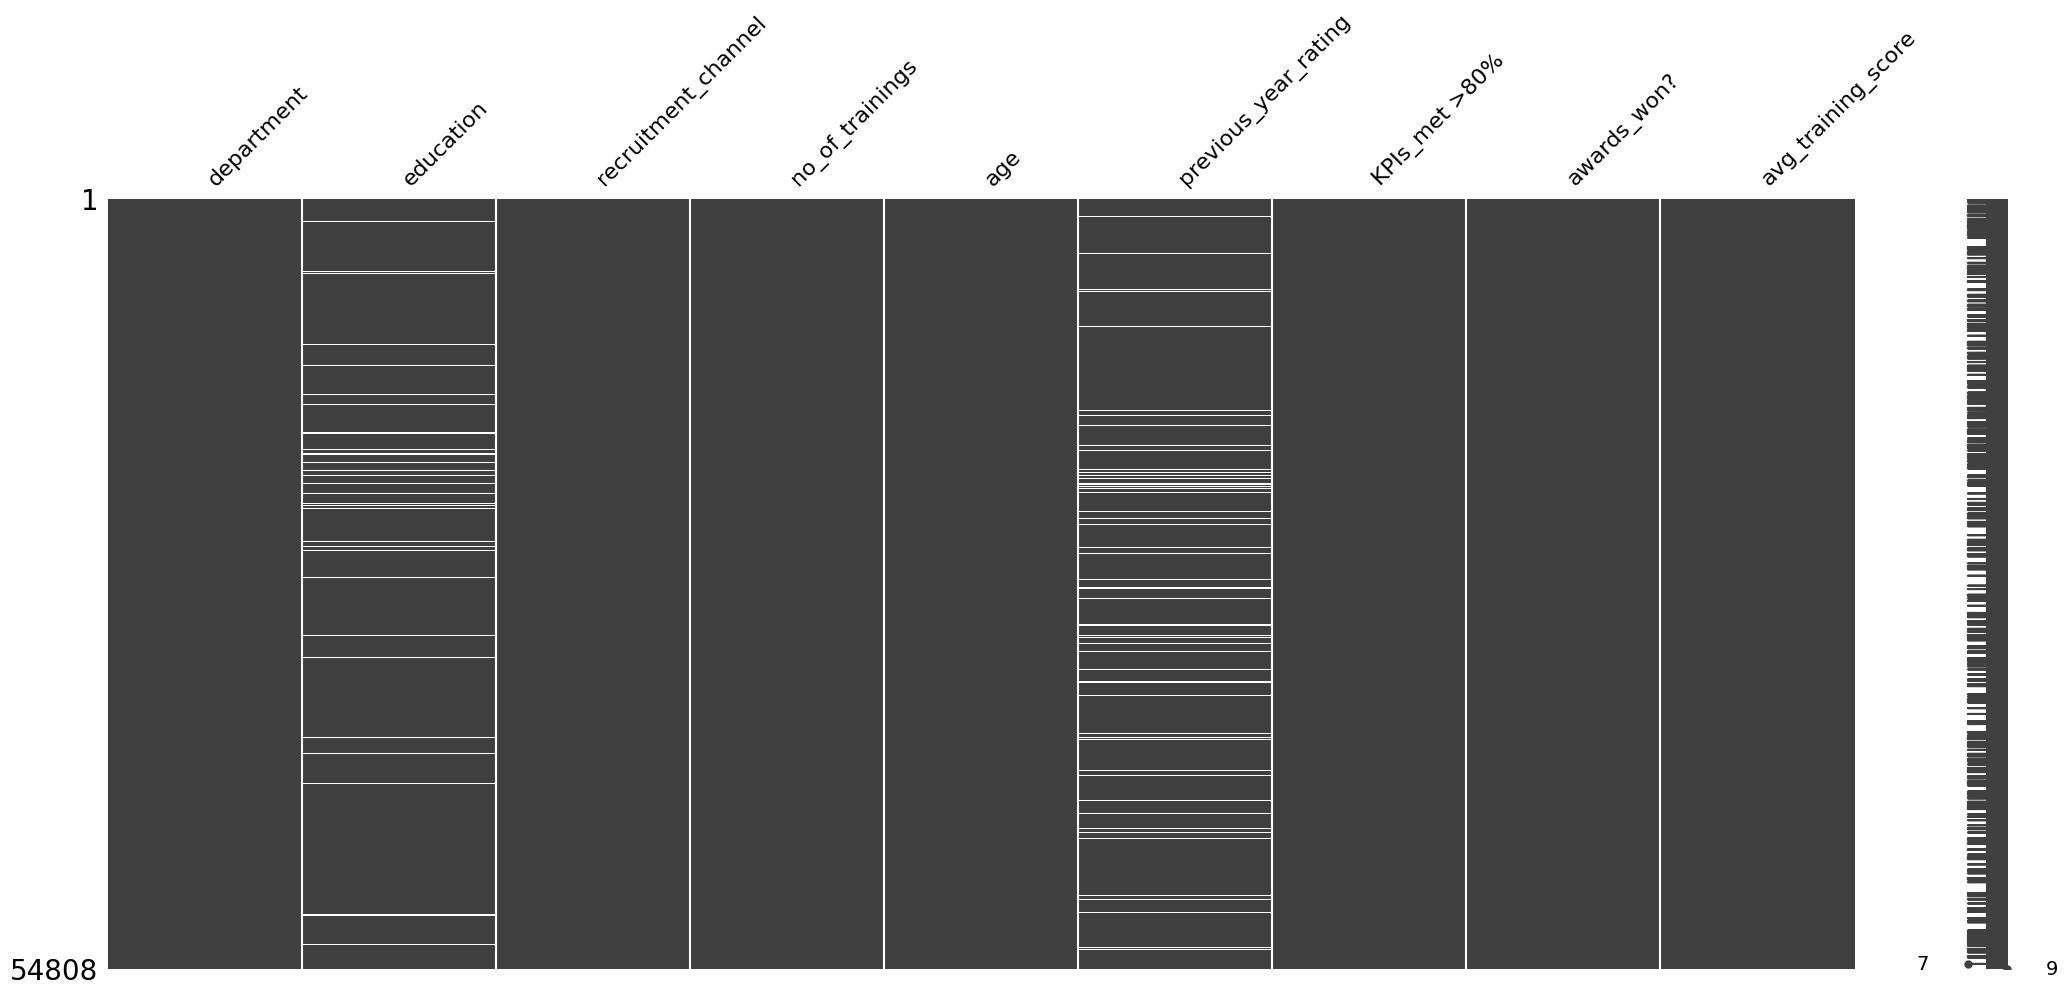

In [21]:
import missingno as msno
msno.matrix(data_train)
plt.show()

Con este grafico nos damos cuenta que hay dos variables que poseen valores nulos.


Corroboramos con el atributo isnull().sum()

In [22]:
data_train.isnull().sum()

department                 0
education               2409
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

## Imputacion de variables 

In [23]:
data_train_cat = data_train.select_dtypes('object')
data_train_num = data_train.select_dtypes('number')

### Variables Categoricas

In [24]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(data_train_cat)
data_train_cat_imputed = pd.DataFrame(imputer_cat.transform(data_train_cat), columns = data_train_cat.columns)
data_train_cat_imputed.head()

,department,education,recruitment_channel
0,Sales & Marketing,Master's & above,sourcing
1,Operations,Bachelor's,other
2,Sales & Marketing,Bachelor's,sourcing
3,Sales & Marketing,Bachelor's,other
4,Technology,Bachelor's,other


In [25]:
imputer_cat.statistics_

array(['Sales & Marketing', "Bachelor's", 'other'], dtype=object)

### Validamos los valores nulos

Antes de la imputacion

In [26]:
data_train_cat.isnull().sum()

department                0
education              2409
recruitment_channel       0
dtype: int64

Despues de la imputacion

In [27]:
data_train_cat_imputed.isnull().sum()

department             0
education              0
recruitment_channel    0
dtype: int64

### Variables Numericas

In [28]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 3)

In [29]:
knn.fit_transform(data_train_num)

array([[ 1., 35.,  5.,  1.,  0., 49.],
       [ 1., 30.,  5.,  0.,  0., 60.],
       [ 1., 34.,  3.,  0.,  0., 50.],
       ...,
       [ 1., 27.,  5.,  1.,  0., 79.],
       [ 1., 29.,  1.,  0.,  0., 45.],
       [ 1., 27.,  1.,  0.,  0., 49.]])

In [30]:
data_train_num_imputed2 = pd.DataFrame(data = knn.fit_transform(data_train_num), columns = data_train_num.columns)

#### Validamos los valores nulos 

Antes de la imputacion

In [31]:
data_train_num.isnull().sum()

no_of_trainings            0
age                        0
previous_year_rating    4124
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Despues de la imputacion

In [32]:
data_train_num_imputed2.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## Enconding 

### variables categoricas

In [33]:
data_train_cat_imputed.describe()

,department,education,recruitment_channel
count,54808,54808,54808
unique,9,3,3
top,Sales & Marketing,Bachelor's,other
freq,16840,39078,30446


In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [35]:
ohe.fit(data_train_cat_imputed)

OneHotEncoder()

In [36]:
ohe.transform(data_train_cat_imputed).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [37]:
columnas = list(ohe.categories_[0])+list(ohe.categories_[1])+list(ohe.categories_[2])

In [38]:
data_train_cat_dummies2 = pd.DataFrame(data = ohe.transform(data_train_cat_imputed).toarray(), columns = columnas)
data_train_cat_dummies2.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## Tratamiento de Valores Extremos 

In [39]:
data_train_num_imputed2.head()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,35.0,5.0,1.0,0.0,49.0
1,1.0,30.0,5.0,0.0,0.0,60.0
2,1.0,34.0,3.0,0.0,0.0,50.0
3,2.0,39.0,1.0,0.0,0.0,50.0
4,1.0,45.0,3.0,0.0,0.0,73.0


In [40]:
data_train_num_imputed2.describe()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.325165,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.233708,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,1.000000,1.000000,99.000000


In [41]:
data_train_num_imputed2.describe(percentiles = [0.50, 0.75, 0.90, 0.95, 0.975, 0.99])

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.325165,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.233708,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,0.000000,0.000000,39.000000
50%,1.000000,33.000000,3.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,1.000000,0.000000,76.000000
90%,2.000000,46.000000,5.000000,1.000000,0.000000,83.000000
95%,2.000000,51.000000,5.000000,1.000000,0.000000,86.000000
97.5%,3.000000,55.000000,5.000000,1.000000,0.000000,88.000000
99%,4.000000,58.000000,5.000000,1.000000,1.000000,91.000000


## Consolidacion

In [42]:
data_train_cat_dummies2.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [43]:
data_train_num_imputed2.head()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,35.0,5.0,1.0,0.0,49.0
1,1.0,30.0,5.0,0.0,0.0,60.0
2,1.0,34.0,3.0,0.0,0.0,50.0
3,2.0,39.0,1.0,0.0,0.0,50.0
4,1.0,45.0,3.0,0.0,0.0,73.0


In [44]:
data_train_total = pd.concat([data_train_cat_dummies2, data_train_num_imputed2], axis = 1)
data_train_total

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,...,Master's & above,other,referred,sourcing,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,35.0,5.0,1.0,0.0,49.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,30.0,5.0,0.0,0.0,60.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,34.0,3.0,0.0,0.0,50.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,2.0,39.0,1.0,0.0,0.0,50.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,45.0,3.0,0.0,0.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,48.0,3.0,0.0,0.0,78.0
54804,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,37.0,2.0,0.0,0.0,56.0
54805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,27.0,5.0,1.0,0.0,79.0
54806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,45.0


In [45]:
data_train_total.isnull().sum()

Analytics               0
Finance                 0
HR                      0
Legal                   0
Operations              0
Procurement             0
R&D                     0
Sales & Marketing       0
Technology              0
Bachelor's              0
Below Secondary         0
Master's & above        0
other                   0
referred                0
sourcing                0
no_of_trainings         0
age                     0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Estandarización

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [47]:
data_scaled = scaler.fit_transform(data_train_total)

In [48]:
columnas = data_train_total.columns

In [49]:
data_train_scaled = pd.DataFrame(data = data_scaled, columns = columnas)
data_train_scaled[target] = data_target_train.values
data_train_scaled.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,...,other,referred,sourcing,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.375,1.0,1.0,0.0,0.166667,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.000000,0.250,1.0,0.0,0.0,0.350000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.000000,0.350,0.5,0.0,0.0,0.183333,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.111111,0.475,0.0,0.0,0.0,0.183333,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.000000,0.625,0.5,0.0,0.0,0.566667,0


## Repetimos para el conjunto de validación

In [50]:
data_test = pd.read_csv('data/test.csv')
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [51]:
employee_id = data_test[id_column]
data_test = data_test.drop(id_column, axis = 1)
data_test = data_test.drop('gender', axis = 1)
data_test = data_test.drop('region', axis = 1)
data_test = data_test.drop('length_of_service', axis = 1)
# data_test = data_test.drop('no_of_trainings', axis = 1)

In [52]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   education             22456 non-null  object 
 2   recruitment_channel   23490 non-null  object 
 3   no_of_trainings       23490 non-null  int64  
 4   age                   23490 non-null  int64  
 5   previous_year_rating  21678 non-null  float64
 6   KPIs_met >80%         23490 non-null  int64  
 7   awards_won?           23490 non-null  int64  
 8   avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.6+ MB


In [53]:
data_test_cat = data_test.select_dtypes('object')
data_test_num = data_test.select_dtypes('number')

## Imputacion de Valores Nulos 

### Numericas

In [54]:
knn.fit_transform(data_test_num)

array([[ 1.        , 24.        ,  4.        ,  1.        ,  0.        ,
        77.        ],
       [ 1.        , 31.        ,  3.        ,  0.        ,  0.        ,
        51.        ],
       [ 1.        , 31.        ,  1.        ,  0.        ,  0.        ,
        47.        ],
       ...,
       [ 1.        , 26.        ,  4.        ,  0.        ,  0.        ,
        50.        ],
       [ 3.        , 27.        ,  2.66666667,  0.        ,  0.        ,
        70.        ],
       [ 3.        , 40.        ,  5.        ,  1.        ,  0.        ,
        89.        ]])

In [55]:
data_test_num_imputed = pd.DataFrame(data = knn.fit_transform(data_test_num), columns = data_test_num.columns)

In [56]:
data_test_num_imputed.head()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,24.0,4.0,1.0,0.0,77.0
1,1.0,31.0,3.0,0.0,0.0,51.0
2,1.0,31.0,1.0,0.0,0.0,47.0
3,3.0,31.0,2.0,0.0,0.0,65.0
4,1.0,30.0,4.0,0.0,0.0,61.0


In [57]:
data_test_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Categoricas

In [58]:
data_test_cat_imputed = pd.DataFrame(imputer_cat.transform(data_test_cat), columns = data_test_cat.columns)
data_test_cat_imputed.head()

,department,education,recruitment_channel
0,Technology,Bachelor's,sourcing
1,HR,Bachelor's,other
2,Sales & Marketing,Bachelor's,other
3,Procurement,Bachelor's,other
4,Finance,Bachelor's,sourcing


In [59]:
data_test_cat_imputed.isnull().sum()

department             0
education              0
recruitment_channel    0
dtype: int64

### Encoding

In [60]:
ohe.fit(data_test_cat_imputed)
columnas = list(ohe.categories_[0])+list(ohe.categories_[1])+list(ohe.categories_[2])

In [61]:
data_test_cat_dummies = pd.DataFrame(data = ohe.transform(data_test_cat_imputed).toarray(), columns = columnas)

In [62]:
data_test_total = pd.concat([data_test_cat_dummies, data_test_num_imputed], axis = 1)

In [63]:
data_test_scaled = pd.DataFrame(data = scaler.fit_transform(data_test_total), columns = data_test_total.columns)
data_test_scaled.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,...,Master's & above,other,referred,sourcing,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.00,0.100,0.75,1.0,0.0,0.633333
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.00,0.275,0.50,0.0,0.0,0.200000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.00,0.275,0.00,0.0,0.0,0.133333
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.25,0.275,0.25,0.0,0.0,0.433333
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.00,0.250,0.75,0.0,0.0,0.366667


In [64]:
data_train_scaled.shape

(54808, 22)

In [65]:
data_test_scaled.shape

(23490, 21)

In [66]:
x = data_train_scaled.drop(target, axis = 1)
y = data_train_scaled[target]

### Dividimos la data

In [67]:
from sklearn.model_selection import train_test_split

Usamos la division train/test de 80/20

In [68]:
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = seed) 


------------------------------------------------------------------------------------------------------

## Regresion Logistica Binaria

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

In [70]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [71]:
y_proba_test = lr.predict_proba(X_test)[:,1]

Matriz de Confusion para el conjunto del test

In [72]:
from sklearn import metrics as metrics

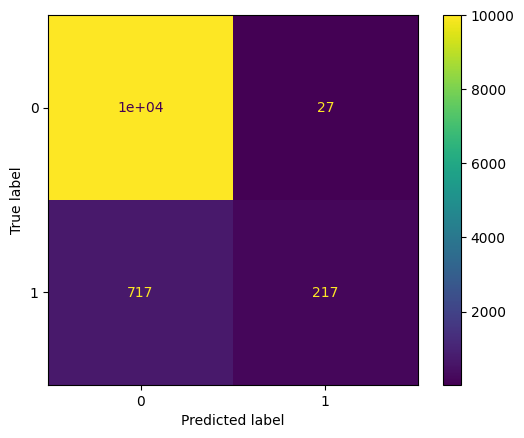

In [73]:
cm = metrics.confusion_matrix(y_test, y_pred_test, labels=lr.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

In [74]:
def metricas_confusion(y_test,y_pred_test):
    print("Matriz confusion: Test")
    cm_test = metrics.confusion_matrix(y_test,y_pred_test)
    print(cm_test)
    
    print("Accuracy: Test")
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    print(accuracy_test)
    
    print("Precision: Test")
    precision_test=metrics.precision_score(y_test,y_pred_test)
    print(precision_test)
    
    print("Recall: Test")
    recall_test=metrics.recall_score(y_test,y_pred_test)
    print(recall_test)

In [75]:
metricas_confusion(y_test,y_pred_test)

Matriz confusion: Test
[[10001    27]
 [  717   217]]
Accuracy: Test
0.9321291735084839
Precision: Test
0.889344262295082
Recall: Test
0.23233404710920771


In [76]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10028
           1       0.89      0.23      0.37       934

    accuracy                           0.93     10962
   macro avg       0.91      0.61      0.67     10962
weighted avg       0.93      0.93      0.91     10962



In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y, y_proba, label=''):
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)

    plt.figure(figsize=(8, 6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c='red')
    plt.plot(fpr, tpr, label=(f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

    auc_train = roc_auc_score(y_test, y_proba_test)
    print(f"AUC Train: {auc_train:.4f}")

In [78]:
roc_auc_score(y_test, y_proba_test)

0.8665730600998148

AUC Train: 0.8666


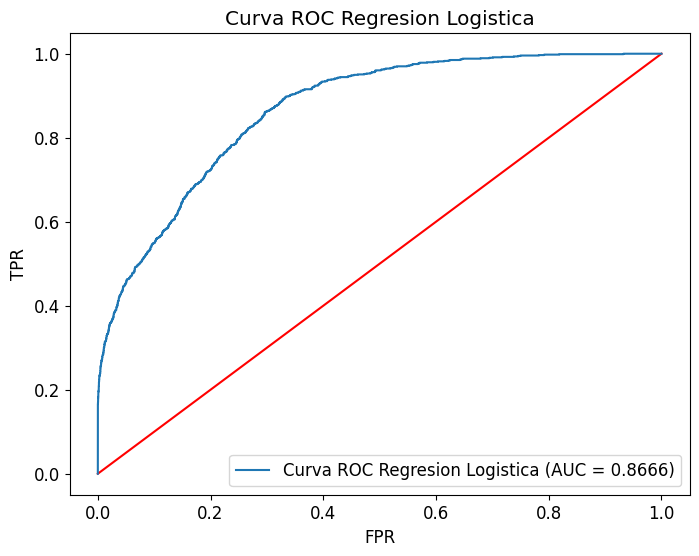

In [79]:
plot_roc_curve(y_test, y_proba_test, 'Regresion Logistica')

### Probando con Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [81]:
clf = DecisionTreeClassifier(random_state = 2)
model_dt = clf.fit(X_train, y_train)

In [82]:
pred = model_dt.predict(X_test)

In [83]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10028
           1       0.48      0.42      0.44       934

    accuracy                           0.91     10962
   macro avg       0.71      0.69      0.70     10962
weighted avg       0.91      0.91      0.91     10962



AUC Train: 0.7039


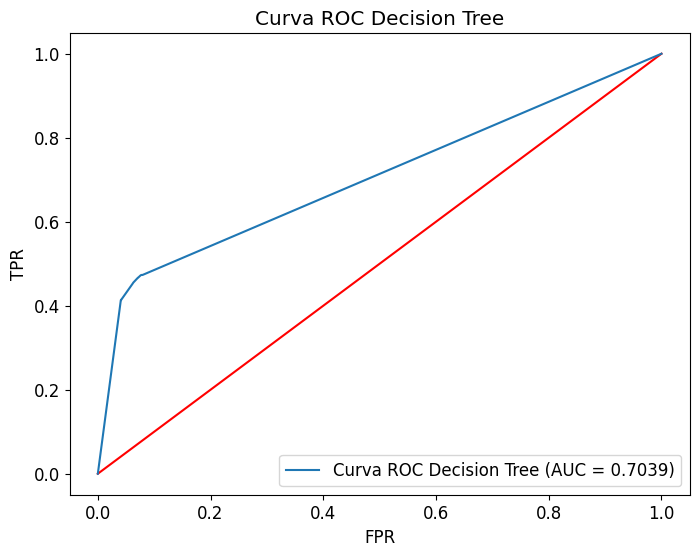

In [84]:
y_proba_test = model_dt.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Decision Tree')

### Probando con random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc = RandomForestClassifier(max_depth = 25, random_state = 0)
model_rfc = rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

In [87]:
print(metrics.classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10028
           1       0.65      0.36      0.46       934

    accuracy                           0.93     10962
   macro avg       0.80      0.67      0.71     10962
weighted avg       0.92      0.93      0.92     10962



AUC Train: 0.8711


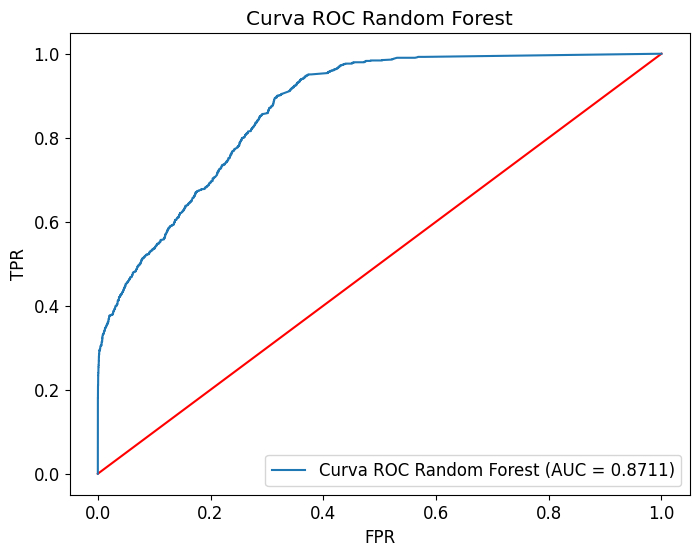

In [88]:
y_proba_test = model_rfc.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Random Forest')

In [89]:
pred_final_svc = model_rfc.predict(data_test_scaled)

In [90]:
data_test_scaled.insert(0, id_column, employee_id)
data_test_scaled.insert(1, target, pred_final_svc)

In [91]:
data_test_scaled.head()

,employee_id,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,...,Master's & above,other,referred,sourcing,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,8724,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00,0.100,0.75,1.0,0.0,0.633333
1,74430,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.00,0.275,0.50,0.0,0.0,0.200000
2,72255,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.00,0.275,0.00,0.0,0.0,0.133333
3,38562,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.25,0.275,0.25,0.0,0.0,0.433333
4,64486,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00,0.250,0.75,0.0,0.0,0.366667


In [92]:
data_test_scaled[target].value_counts()

0    22397
1     1093
Name: is_promoted, dtype: int64